# DWI Workshop - Day 2

## Preprocessing

    1. Brain Extraction
    2. Susceptibility Distortion Correction - FSL
    3. Denoising
    4. Eddy Current Correction - FSL
    4. Gibbs Ringing
    
### Brain Extraction

### Susceptibility Distortion Correction

### Denoising 

Diffusion MRI is SNR limited, which will ultimately affect downstream tasks such as DTI, DKI, and tractography.

1. Gaussian Kernel or Median filters. 

2. Low Rank Approximations - i.e PCA, threshold the singular value spectrum, discarding the noisy components.

3. Sparsity - using a predetermined basis, from which to perform dictionary learning.

4. Smoothness via Total Variation Normalization

5. Patch2Self - Self Supervised Denoising. Assume statistical independence of noise.  


### Gibbs Ringing

### Eddy Current Correction

    

## Denoising

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.io.image import load_nifti, save_nifti
import nibabel as nib
from dipy.denoise.patch2self import patch2self
from dipy.io import read_bvals_bvecs

In [10]:
data = nib.load('data/stanford_hardi/HARDI150.nii.gz').get_fdata()
bval, bvec = read_bvals_bvecs('data/stanford_hardi/HARDI150.bval',
                             'data/stanford_hardi/HARDI150.bvec')

In [14]:
print(data.shape, bval.shape)

(81, 106, 76, 160) (160,)


In [15]:
# model is ordinary least squares, can also use ridge regression or lasso
data_denoised = patch2self(data[...,:10], bval[:10], model='ols', shift_intensity=True,
                          clip_negative_vals=False, b0_threshold=50, verbose=True)

Denoised b0 Volume:  0
Denoised b0 Volume:  1
Denoised b0 Volume:  2
Denoised b0 Volume:  3
Denoised b0 Volume:  4
Denoised b0 Volume:  5
Denoised b0 Volume:  6
Denoised b0 Volume:  7
Denoised b0 Volume:  8
Denoised b0 Volume:  9
Total time taken for Patch2Self:  9.861051082611084  seconds


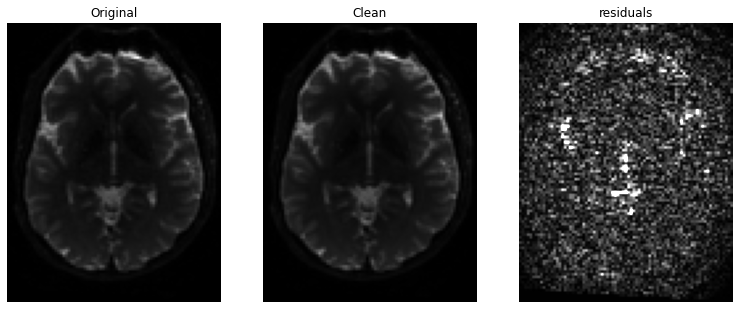

In [42]:
plt.figure(figsize=(13,13))
plt.subplot(131), plt.imshow(np.rot90(data[:,:,30,8]), cmap='gray'), plt.axis('off'), plt.title('Original')
plt.subplot(132), plt.imshow(np.rot90(data_denoised[:,:,30,8]),cmap='gray'), plt.axis('off'), plt.title('Clean')
plt.subplot(133), plt.imshow(np.rot90(np.sqrt((data_denoised[:,:,30,8] - 
                                     data[:,:,30,8])**2)), cmap='gray'), plt.axis('off'), plt.title('residuals')
plt.clim(0,100)
plt.show()


## Eddy Correction